In [1]:
import numpy as np
import pandas as pd

In [7]:
import os

In [8]:
train_folder = '../input/gtsrb-german-traffic-sign/Train'
num_of_categories = len(os.listdir(train_folder))
num_of_categories

43

In [9]:
folders = os.listdir(train_folder)
images = []
classes = []
for folder in folders:
    images.append(len(os.listdir(train_folder + '/' + folder)))
    classes.append(int(folder))
images , classes

([1440,
  1110,
  210,
  390,
  2250,
  1200,
  510,
  2010,
  1860,
  390,
  360,
  240,
  240,
  300,
  240,
  1500,
  240,
  1410,
  2070,
  2100,
  210,
  780,
  420,
  1200,
  540,
  420,
  2160,
  600,
  630,
  1410,
  2220,
  450,
  780,
  1980,
  1470,
  330,
  360,
  420,
  1320,
  210,
  689,
  270,
  270],
 [7,
  17,
  19,
  22,
  2,
  35,
  23,
  10,
  5,
  36,
  20,
  27,
  41,
  39,
  32,
  25,
  42,
  8,
  38,
  12,
  0,
  31,
  34,
  18,
  28,
  16,
  13,
  26,
  15,
  3,
  1,
  30,
  14,
  4,
  9,
  21,
  40,
  6,
  11,
  37,
  33,
  29,
  24])

In [10]:
classes_list = []
for i, j in zip(images, classes):
    classes_list.append({'class':j, 'images':i})
classes_list    

[{'class': 7, 'images': 1440},
 {'class': 17, 'images': 1110},
 {'class': 19, 'images': 210},
 {'class': 22, 'images': 390},
 {'class': 2, 'images': 2250},
 {'class': 35, 'images': 1200},
 {'class': 23, 'images': 510},
 {'class': 10, 'images': 2010},
 {'class': 5, 'images': 1860},
 {'class': 36, 'images': 390},
 {'class': 20, 'images': 360},
 {'class': 27, 'images': 240},
 {'class': 41, 'images': 240},
 {'class': 39, 'images': 300},
 {'class': 32, 'images': 240},
 {'class': 25, 'images': 1500},
 {'class': 42, 'images': 240},
 {'class': 8, 'images': 1410},
 {'class': 38, 'images': 2070},
 {'class': 12, 'images': 2100},
 {'class': 0, 'images': 210},
 {'class': 31, 'images': 780},
 {'class': 34, 'images': 420},
 {'class': 18, 'images': 1200},
 {'class': 28, 'images': 540},
 {'class': 16, 'images': 420},
 {'class': 13, 'images': 2160},
 {'class': 26, 'images': 600},
 {'class': 15, 'images': 630},
 {'class': 3, 'images': 1410},
 {'class': 1, 'images': 2220},
 {'class': 30, 'images': 450},
 

In [11]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [12]:
image_data = []
image_labels = []

for i in range(num_of_categories):
    path = train_folder + '/' + str(i)
    sign_images = os.listdir(path)
    print(len(sign_images))
    for img in sign_images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((30, 30))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)
'''for img in sign_images[:3]:
    image = cv2.imread(path + '/' + img)
    plt.imshow(image)
    plt.show()'''

210
2220
2250
1410
1980
1860
420
1440
1410
1470
2010
1320
2100
2160
780
630
420
1110
1200
210
360
330
390
510
270
1500
600
240
540
270
450
780
240
689
420
1200
390
210
2070
300
360
240
240
(39209, 30, 30, 3) (39209,)


"for img in sign_images[:3]:\n    image = cv2.imread(path + '/' + img)\n    plt.imshow(image)\n    plt.show()"

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.25, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (29406, 30, 30, 3)
X_valid.shape (9803, 30, 30, 3)
y_train.shape (29406,)
y_valid.shape (9803,)


In [15]:
import tensorflow as tf
import keras

2025-06-21 13:10:47.166092: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750511447.346111      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750511447.398732      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [16]:
y_train = keras.utils.to_categorical(y_train, num_of_categories)
y_val = keras.utils.to_categorical(y_val, num_of_categories)

print(y_train.shape)
print(y_val.shape)

(29406, 43)
(9803, 43)


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [18]:
model = Sequential()

model.add(Input(shape=(30,30,3)))
# 1st Convolutional Block
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

model.add(Dense(num_of_categories, activation='softmax'))  # Output layer for classification

I0000 00:00:1750511499.627953      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1750511499.628671      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [19]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

cnn_mod = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=30, validation_data=(X_val, y_val))

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1750511552.119315     109 service.cc:148] XLA service 0x7a9fcc003430 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750511552.119984     109 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1750511552.120004     109 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1750511552.413021     109 cuda_dnn.cc:529] Loaded cuDNN version 90300


 13/919 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.0397 - loss: 3.7502  

I0000 00:00:1750511554.880214     109 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


919/919 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - accuracy: 0.1922 - loss: 2.9411 - val_accuracy: 0.6879 - val_loss: 0.9917
Epoch 2/30
919/919 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.6343 - loss: 1.1327 - val_accuracy: 0.8957 - val_loss: 0.3627
Epoch 3/30
919/919 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.7933 - loss: 0.6324 - val_accuracy: 0.9404 - val_loss: 0.1914
Epoch 4/30
919/919 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.8709 - loss: 0.3973 - val_accuracy: 0.9732 - val_loss: 0.1089
Epoch 5/30
919/919 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9038 - loss: 0.3079 - val_accuracy: 0.9701 - val_loss: 0.0988
Epoch 6/30
919/919 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9228 - loss: 0.2466 - val_accuracy: 0.9829 - val_loss: 0.0617
Epoch 7/30
919/919 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9351 - loss: 0.1979 - val_accuracy: 0.9885 - val_loss: 0.0424
Epoch 8/30
919/919 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9454 - loss: 0.1749 - val_accurac

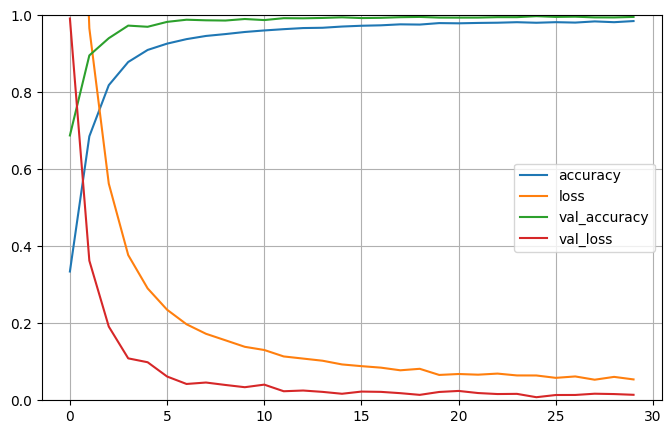

In [23]:
pd.DataFrame(cnn_mod.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
test = pd.read_csv('../input/gtsrb-german-traffic-sign' + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread('../input/gtsrb-german-traffic-sign' + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((30, 30))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

pred = model.predict(X_val)

# Get the class index with highest probability for each image
predicted_classes = np.argmax(pred, axis=1)
true_classes = np.argmax(y_val, axis=1)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(true_classes, predicted_classes)*100)
'''for img in imgs[:10]:
    image = cv2.imread('../input/gtsrb-german-traffic-sign' + '/' +img)
    plt.imshow(image)
    plt.show()'''

307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test Data accuracy:  99.5715597266143


"for img in imgs[:10]:\n    image = cv2.imread('../input/gtsrb-german-traffic-sign' + '/' +img)\n    plt.imshow(image)\n    plt.show()"

In [26]:

model.save('german_traffic_sign.h5')



In [27]:
import os
os.listdir('/kaggle/working')


['.virtual_documents', 'german_traffic_sign.h5']